In [1]:
import numpy as np
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


In [2]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
import keras.backend as K
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [4]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [7]:
keras.__version__

'2.3.0-tf'

In [8]:
# Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
input_shape=X_train.shape[1:]
X_input = Input(input_shape)

In [9]:
# Zero-Padding: pads the border of X_input with zeroes
X = ZeroPadding2D((3, 3))(X_input)

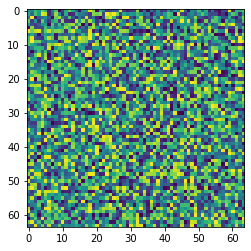

In [10]:
im=np.random.rand(64,64)
plt.imshow(im)

In [11]:
#https://medium.com/@ecaradec/understanding-keras-tensors-d405a63e069e
from keras import backend as K
i = K.placeholder(shape=(4,), name="input")
j=K.square(i)
f = K.function([i], [j])
ival = np.ones((4,))
print(f([ival]))

[array([1., 1., 1., 1.], dtype=float32)]


In [12]:
i = K.placeholder(shape=(4,), name="input")
square = K.square(i)
f = K.function([i], [square])
ival = np.ones((4,))*2
print( f([ival]) )

[array([4., 4., 4., 4.], dtype=float32)]


### Keras  Tutorial 

In [ ]:
import tensorflow as tf
model=tf.keras.Sequential([tf.keras.layers.Dense(units=1,input_shape=[1])])
model.compile(optimizer='sgd',loss="mean_squared_error")
xs=np.array([-1,0,1,2,3,4,5],dtype="float")
ys=np.array([-3,-1,1,3,5,7,9],dtype="float")
model.fit(xs,ys,epochs=500)
print(model.predict([6,9]))
model.predict([10])

Eventhough the answer is 19 we are getting answer very close to it but not 19<br> because The first is that you trained it using very little data. There's only six points. Those six points are linear but there's no guarantee that for every X, the relationship will be Y equals 2X minus 1. There's a very high probability that Y equals 19 for X equals 10, but the neural network isn't positive. So it will figure out a realistic value for Y. That's the second main reason. When using neural networks, as they try to figure out the answers for everything, they deal in probability. You'll see that a lot and you'll have to adjust how you handle answers to fit. Keep that in mind as you work through the code. Okay, enough theory. Now let's get hands-on and write the code that we just saw and then we can run it.

In [2]:
from tensorflow import keras
import tensorflow as tf

In [3]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_data,train_labels),(test_data,test_lables)=fashion_mnist.load_data()

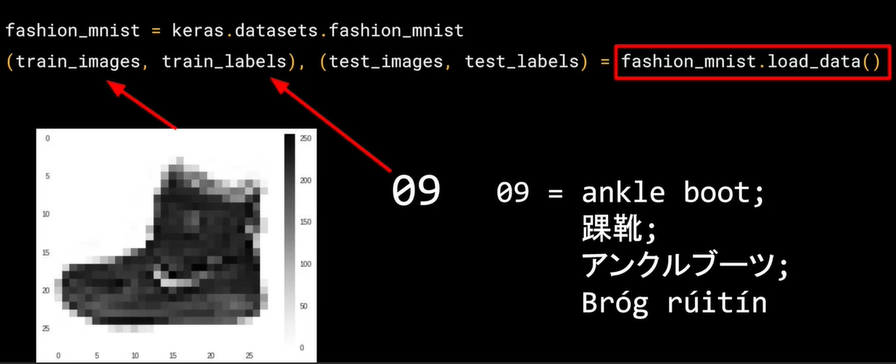

- **Why label "boats" is converted into label "9"????**<br>
There's two main reasons. First, of course, is that computers do better with numbers than they do with texts. Second, importantly, is that this is something that can help us reduce bias. If we labeled it as an ankle boot, we would be of course biasing towards English speakers. But with it being a numeric label, we can then refer to it in our appropriate language be it English, Chinese, Japanese, or here, even Irish Gaelic.<br>
Here you saw how the data can be loaded into Python data structures that make it easy to train a neural network. You saw how the image is represented as a 28x28 array of greyscales, and how its label is a number. Using a number is a first step in avoiding bias -- instead of labelling it with words in a specific language and excluding people who don’t speak that language! You can learn more about bias and techniques to avoid it.<br>
** You can read further <a href="https://developers.google.com/machine-learning/fairness-overview/"> here </a>**.

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

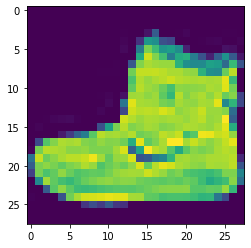

In [17]:
np.set_printoptions(linewidth=500)
import matplotlib.pyplot as plt
plt.imshow(train_data[0])
print(train_data[0])
#print(train_data[0])

### CNN model upon FashionMNIST Dataset

In [4]:
FashionModel=keras.Sequential([keras.layers.Flatten(),keras.layers.Dense(units=128,activation=tf.nn.relu),
                               keras.layers.Dense(units=10,activation=tf.nn.softmax)])
train_data=train_data/255
test_data=test_data/255
FashionModel.compile(optimizer = tf.optimizers.Adam(),loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
FashionModel.fit(train_data, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4955 - accuracy: 0.8275
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3731 - accuracy: 0.8655
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3337 - accuracy: 0.8788
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3125 - accuracy: 0.8860
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2927 - accuracy: 0.8914


In [5]:
FashionModel.evaluate(test_data,test_lables)

313/313 [==============================] - 1s 2ms/step - loss: 0.3424 - accuracy: 0.8782


[0.3423760235309601, 0.8781999945640564]

FashionModel has three layers 
- first layer is a flatten layers which takes (28,28) image data and flattens it into 28*28 neurons nodes which here is a input layer
- second layer has 128 neurons units in it which takes the input layers values and each neuron performs operation(Ax+b) and applys the specified activation on it here it is relu activation so at last we end up with 128 values
- third layer has 10 units which acts similar to the second layer but performs softmax operation instead of relu, here this third layer is the output layer which outputs probability of input node being respr=ective node

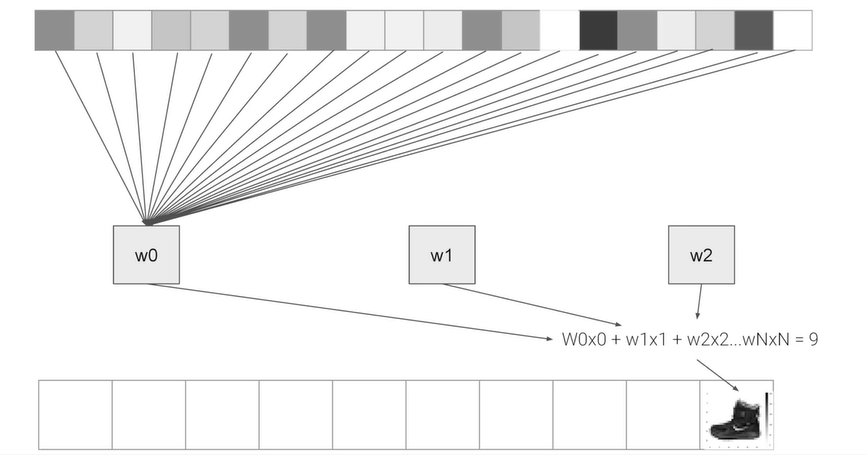

#### FashionMNIST CNN model using callback()

In [6]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.4711 - accuracy: 0.8328
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4709 - accuracy: 0.8328


#### Trying Out Different CNN model upon FashionMNIST Dataset

In [9]:
mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128,activation="relu"),tf.keras.layers.Dense(10,activation="softmax")])
model.compile(optimizer=tf.optimizers.Adam(),loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [10]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.3762 - accuracy: 0.8663
Epoch 2/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2502 - accuracy: 0.9096
Epoch 3/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2039 - accuracy: 0.9248
Epoch 4/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.1703 - accuracy: 0.9366
Epoch 5/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1406 - accuracy: 0.9477


In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.2647 - accuracy: 0.9099


[0.2647337019443512, 0.9099000096321106]

### ImageGenerator

<a href="https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html"> Article</a>

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import zipfile

In [15]:
local_zip = r'C:\Users\ranad\Desktop\Sche\Deep learning\Data\horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(r'C:\Users\ranad\Desktop\Sche\Deep learning\Data\horse-or-human')
zip_ref.close()

In [16]:
print(os.getcwd()) ## Few Command

C:\Users\ranad\Desktop\Sche\Deep learning\Frameworks


In [17]:
local_add=r'C:\Users\ranad\Desktop\Sche\Deep learning\Data\horse-or-human'
# Directory with our training horse pictures
train_horse_dir = os.path.join(local_add+'\\horses')

# Directory with our training human pictures
train_human_dir = os.path.join(local_add+'\\humans')

In [18]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


In [19]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

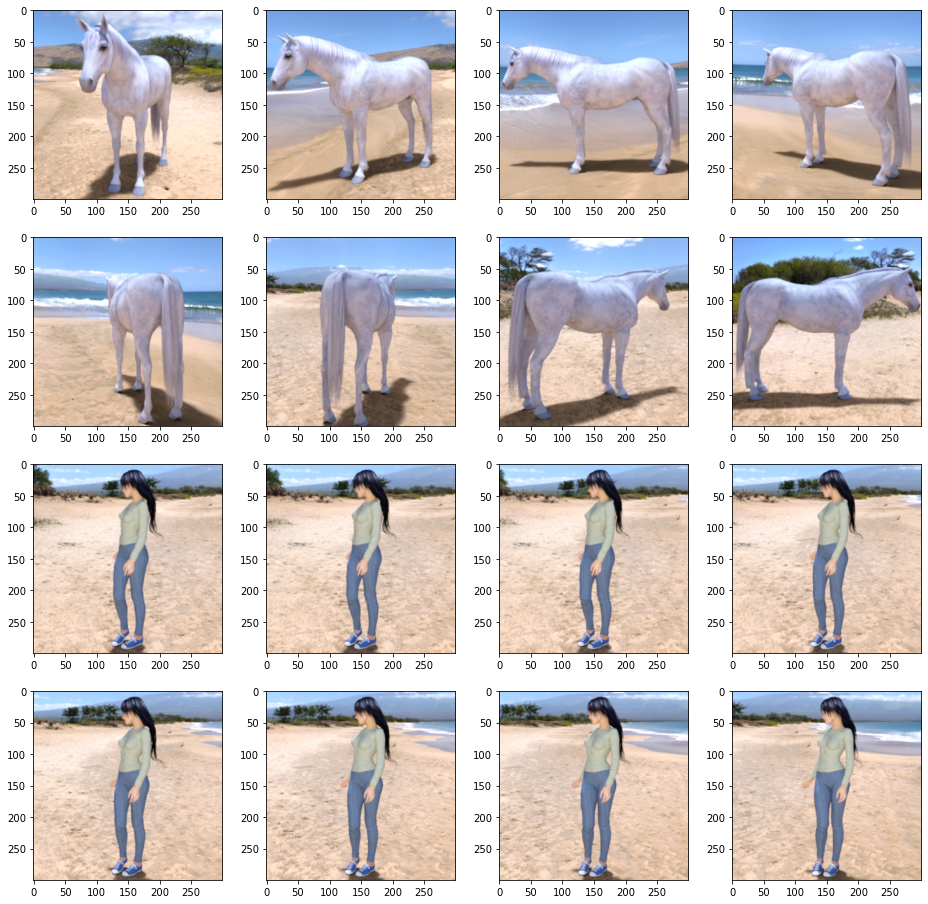

In [21]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('on') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [22]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [23]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 33, 33, 64)       

In [25]:
#from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        local_add,  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 1027 images belonging to 2 classes.


##### Fitting the model with ImageeGenerator

In [26]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 27s 3s/step - loss: 0.9135 - accuracy: 0.5017
Epoch 2/15
8/8 [==============================] - 28s 3s/step - loss: 0.6420 - accuracy: 0.5818
Epoch 3/15
8/8 [==============================] - 29s 4s/step - loss: 0.7254 - accuracy: 0.6574
Epoch 4/15
8/8 [==============================] - 30s 4s/step - loss: 0.4484 - accuracy: 0.8576
Epoch 5/15
8/8 [==============================] - 33s 4s/step - loss: 0.3854 - accuracy: 0.8376
Epoch 6/15
8/8 [==============================] - 26s 3s/step - loss: 0.2349 - accuracy: 0.9099
Epoch 7/15
8/8 [==============================] - 27s 3s/step - loss: 1.4094 - accuracy: 0.8654
Epoch 8/15
8/8 [==============================] - 27s 3s/step - loss: 0.2353 - accuracy: 0.9232
Epoch 9/15
8/8 [==============================] - 28s 3s/step - loss: 0.1124 - accuracy: 0.9588
Epoch 10/15
8/8 [==============================] - 28s 4s/step - loss: 0.0913 - accuracy: 0.9622
Epoch 11/15
8/8 [======================

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

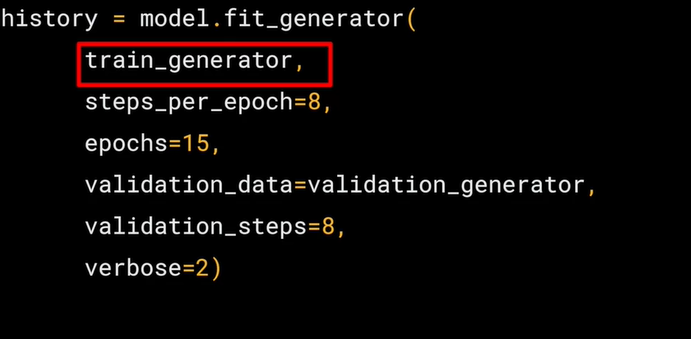

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)